In [1]:
data(Boston,package="MASS")

In [2]:
library(dplyr, warn.conflicts = FALSE)
library(moments)
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=2)
source('multiplot.r')

In [8]:
Boston$medv <- NULL
Boston$chas <- NULL

In [10]:
Boston_samp = sample_n(Boston, 5)

In [11]:
stats = data.frame(feature=colnames(Boston_samp))
stats['mean_'] = sapply(Boston_samp, mean)
stats['sd_'] = sapply(Boston_samp, sd)
stats['skewness_'] = sapply(Boston_samp, skewness)
stats['kurtosis_'] = sapply(Boston_samp, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_
crim,0.187872,0.09581351,0.34148356,1.557615
zn,4.400000,9.83869910,1.50000000,3.250000
indus,8.664000,7.58990975,1.29925097,3.031182
nox,0.499000,0.07582216,0.96492981,2.574643
rm,6.443800,1.08013411,1.11216800,2.719638
age,56.740000,43.37727516,-0.35296285,1.215177
dis,4.157640,2.31911247,0.46803236,1.641877
rad,5.000000,2.34520788,0.39005288,1.342975
tax,300.000000,94.41398202,0.35632088,1.983397
ptratio,18.680000,1.54499191,0.97193492,2.413933


In [12]:
stats_df = data.frame(feature=colnames(Boston))
stats_df['mean_'] = sapply(Boston, mean)
stats_df['sd_'] = sapply(Boston, sd)
stats_df['skewness_'] = sapply(Boston, skewness)
stats_df['kurtosis_'] = sapply(Boston, kurtosis)
stats_df

feature,mean_,sd_,skewness_,kurtosis_
crim,3.6135236,8.6015451,5.2076524,39.752786
zn,11.3636364,23.3224530,2.2190631,6.979949
indus,11.1367787,6.8603529,0.2941463,1.766782
nox,0.5546951,0.1158777,0.7271442,2.924136
rm,6.2846344,0.7026171,0.4024147,4.861027
age,68.5749012,28.1488614,-0.5971856,2.029986
dis,3.7950427,2.1057101,1.0087788,3.471299
rad,9.5494071,8.7072594,1.0018335,2.129479
tax,408.2371542,168.5371161,0.6679683,1.857015
ptratio,18.4555336,2.1649455,-0.7999445,2.705884


In [14]:
Boston_sc_df <- data.frame(scale(Boston))

In [16]:
stats_sc = data.frame(feature=colnames(Boston_sc_df))
stats_sc['mean_'] = sapply(Boston_sc_df, mean)
stats_sc['sd_'] = sapply(Boston_sc_df, sd)
stats_sc['skewness_'] = sapply(Boston_sc_df, skewness)
stats_sc['kurtosis_'] = sapply(Boston_sc_df, kurtosis)
stats_sc

feature,mean_,sd_,skewness_,kurtosis_
crim,-7.202981e-18,1,5.2076524,39.752786
zn,2.282481e-17,1,2.2190631,6.979949
indus,1.595296e-17,1,0.2941463,1.766782
nox,-2.150022e-16,1,0.7271442,2.924136
rm,-1.056462e-16,1,0.4024147,4.861027
age,-1.643357e-16,1,-0.5971856,2.029986
dis,1.153079e-16,1,1.0087788,3.471299
rad,4.799652e-17,1,1.0018335,2.129479
tax,2.024415e-17,1,0.6679683,1.857015
ptratio,-3.924246e-16,1,-0.7999445,2.705884


# Scaling

In [18]:
original_v_scaled <- function (feature) {
    original_feature <- as.vector(Boston[[feature]])
    scaled_feature <- as.vector(Boston_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}

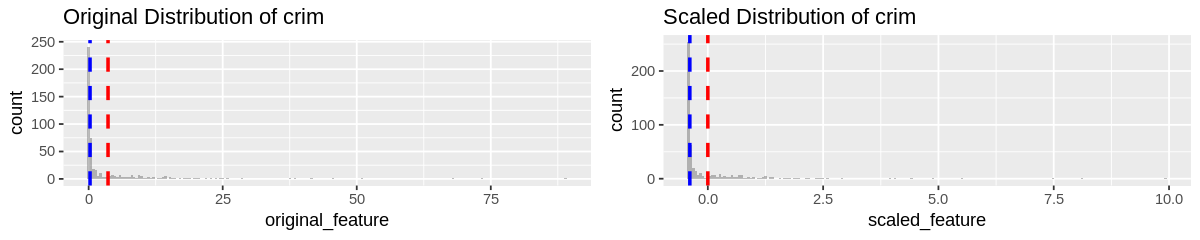

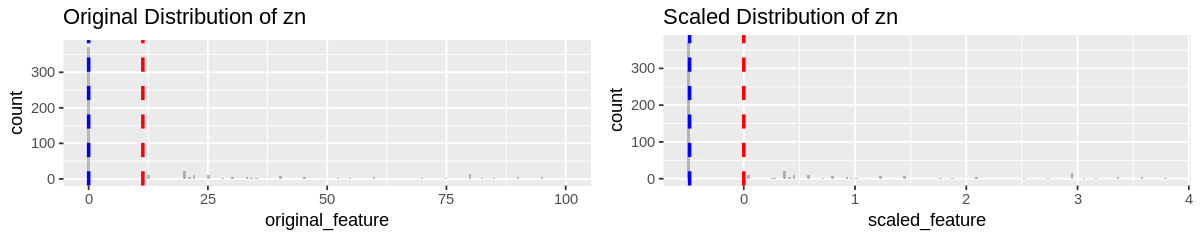

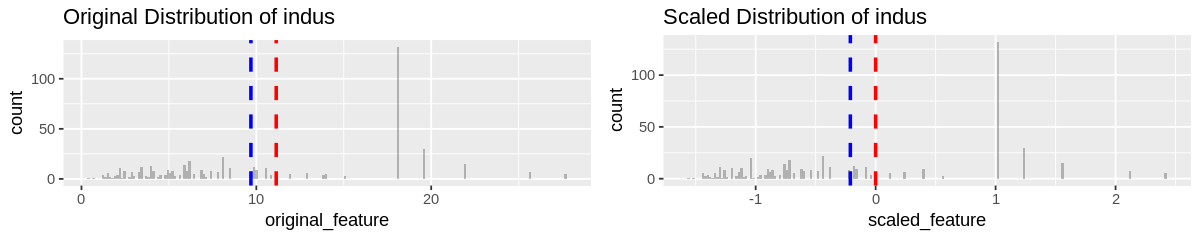

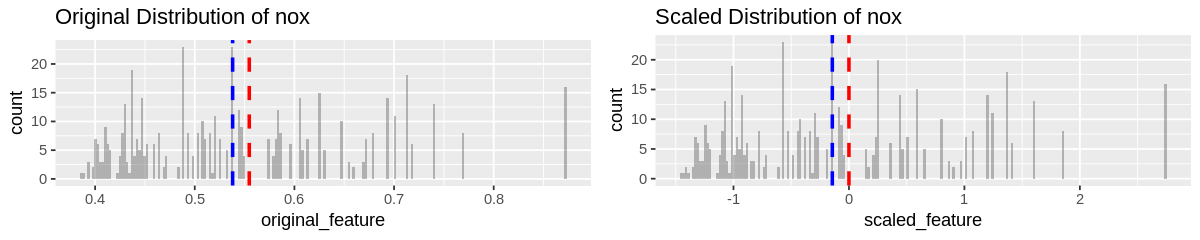

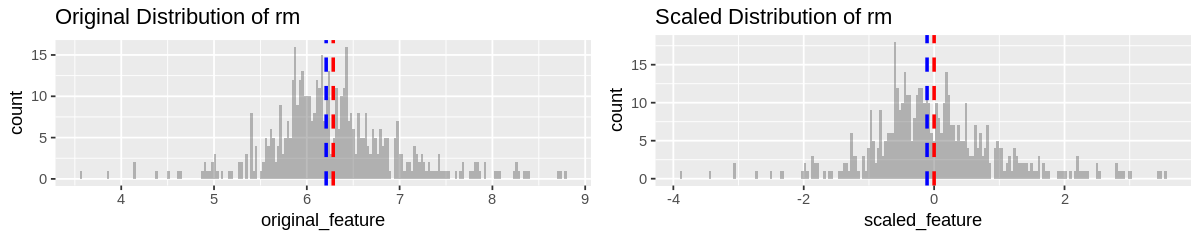

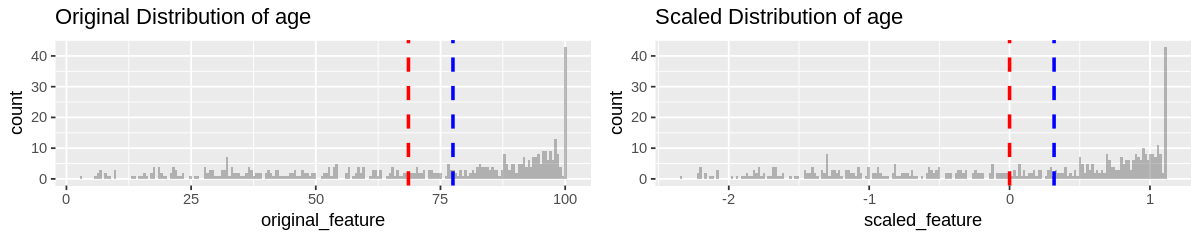

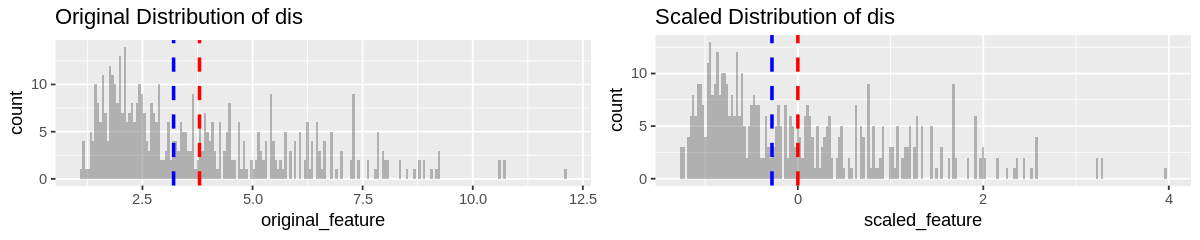

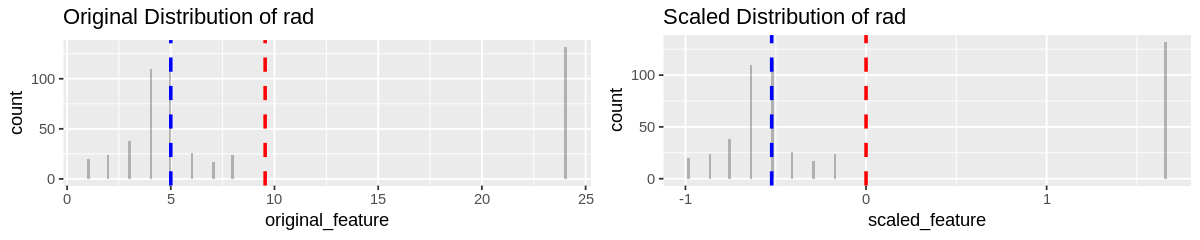

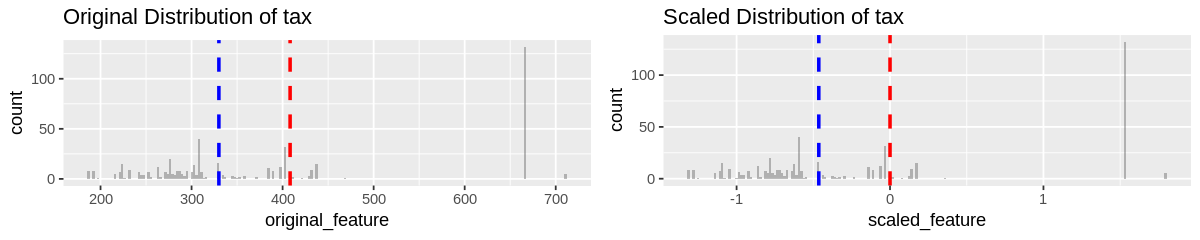

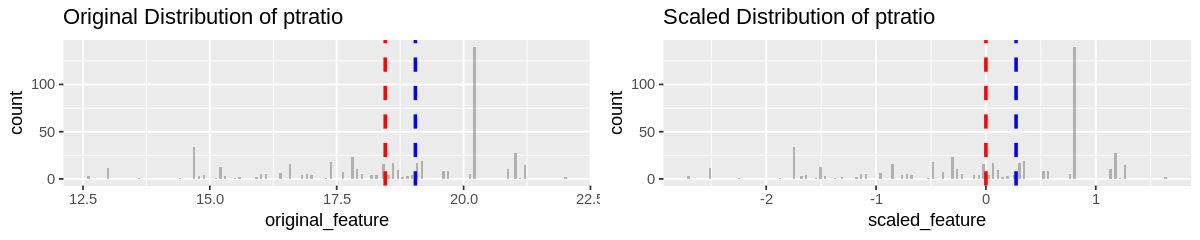

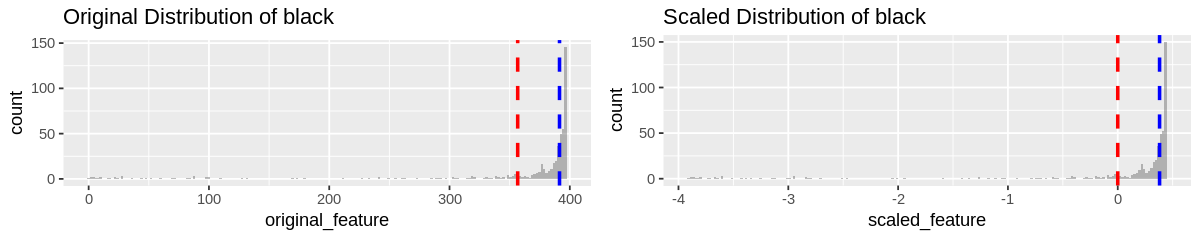

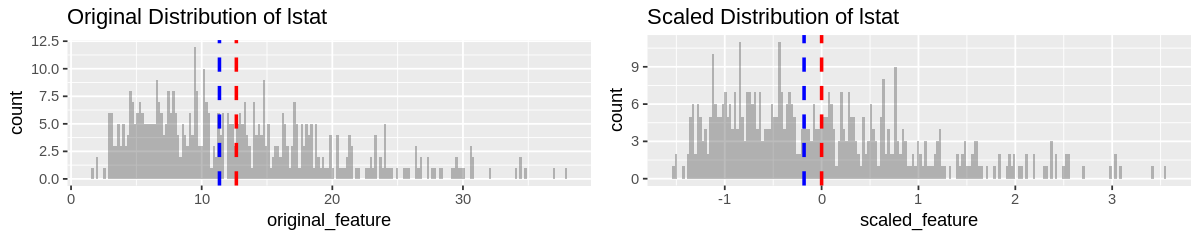

In [19]:
original_v_scaled('crim')
original_v_scaled('zn')
original_v_scaled('indus')
original_v_scaled('nox')
original_v_scaled('rm')
original_v_scaled('age')
original_v_scaled('dis')
original_v_scaled('rad')
original_v_scaled('tax')
original_v_scaled('ptratio')
original_v_scaled('black')
original_v_scaled('lstat')

There are many different ways to determine the skew. To determine skew using a histogram, look at the direction of the tail. Using boxplots are also very good ways to determining the skew of a feature. Another way is to compare the mean, median and mode.<br/>

eyeballing histogram:<br/>
crim: right skewed <br/>
zn: right skewed<br/>
indus: bimodal or left skewed<br/>
nox: pretty normal<br/>
rn: pretty normal<br/>
age: left skewed<br/>
dis: right skewed<br/>
rad: bimodal<br/>
tax: left skewed<br/>
ptratio: left skewed<br/>
black: left skewed<br/>
lstat: right skewed<br/>

The scaled feature reduces the scale of the x-axis, and setting the mean to approximately 0, and the standard deviation to 1. Other factors such as skew and kurtosis remains the same, this just helps for better visualization. 

# Deskew

In [20]:
skewness_ = data.frame(feature=colnames(Boston_sc_df))
skewness_['skew_'] = sapply(Boston, skewness)
skewness_['skew_sc'] = sapply(Boston, skewness)
skewness_

feature,skew_,skew_sc
crim,5.2076524,5.2076524
zn,2.2190631,2.2190631
indus,0.2941463,0.2941463
nox,0.7271442,0.7271442
rm,0.4024147,0.4024147
age,-0.5971856,-0.5971856
dis,1.0087788,1.0087788
rad,1.0018335,1.0018335
tax,0.6679683,0.6679683
ptratio,-0.7999445,-0.7999445


In [21]:
Boston_log_df = log(Boston)
Boston_log_sc_df = data.frame(scale(Boston_log_df))

In [22]:
skewness_['skew_log_'] = sapply(Boston_log_df, skewness)
skewness_['skew_log_sc'] = sapply(Boston_log_sc_df, skewness)
skewness_

feature,skew_,skew_sc,skew_log_,skew_log_sc
crim,5.2076524,5.2076524,0.4047301,0.4047301
zn,2.2190631,2.2190631,NaN,NaN
indus,0.2941463,0.2941463,-0.6412176,-0.6412176
nox,0.7271442,0.7271442,0.3567181,0.3567181
rm,0.4024147,0.4024147,-0.2937892,-0.2937892
age,-0.5971856,-0.5971856,-1.6706836,-1.6706836
dis,1.0087788,1.0087788,0.1522770,0.1522770
rad,1.0018335,1.0018335,0.2857667,0.2857667
tax,0.6679683,0.6679683,0.3295759,0.3295759
ptratio,-0.7999445,-0.7999445,-1.0126120,-1.0126120


In [23]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(Boston[[feature]])
    scaled_feature <- as.vector(Boston_sc_df[[feature]])
    log_feature <- as.vector(Boston_log_df[[feature]])
    log_scaled_feature <- as.vector(Boston_log_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}

Warning message:
“Removed 372 rows containing non-finite values (stat_bin).”Warning message:
“Removed 506 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

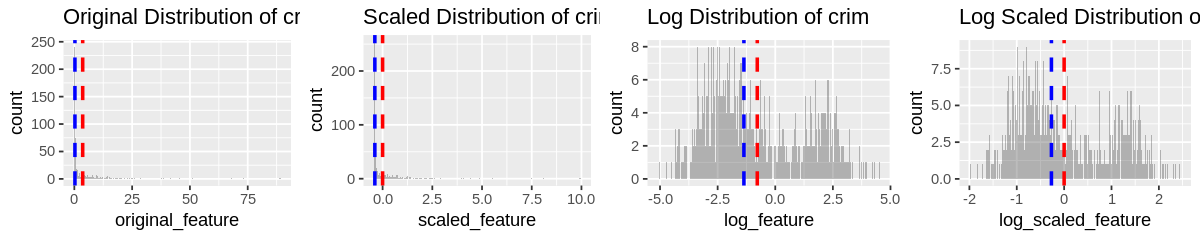

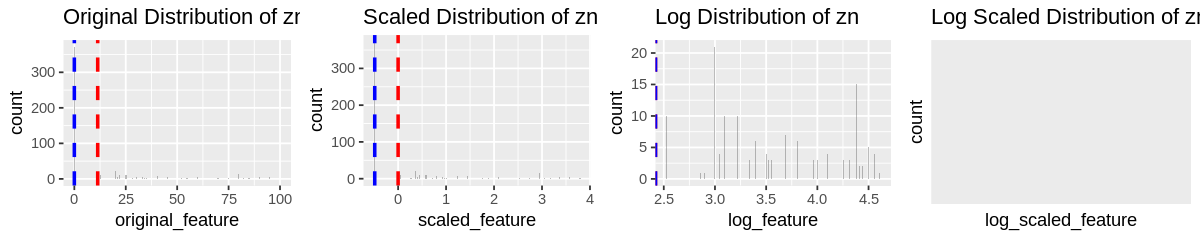

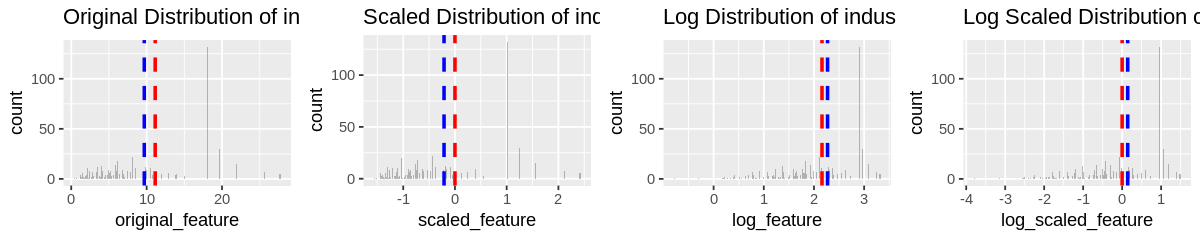

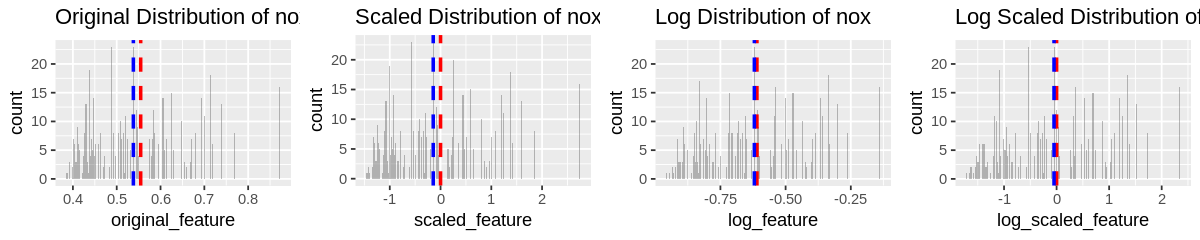

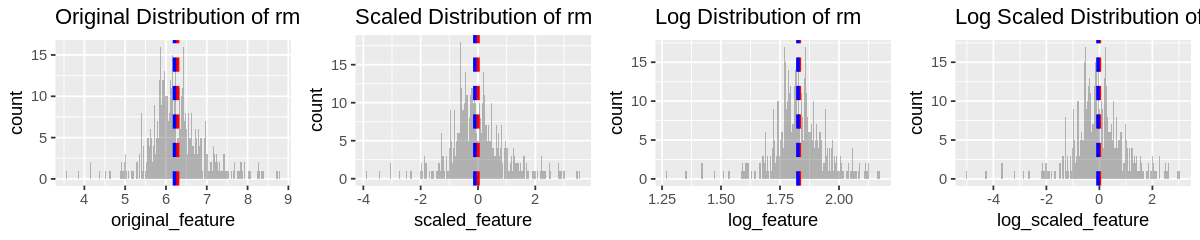

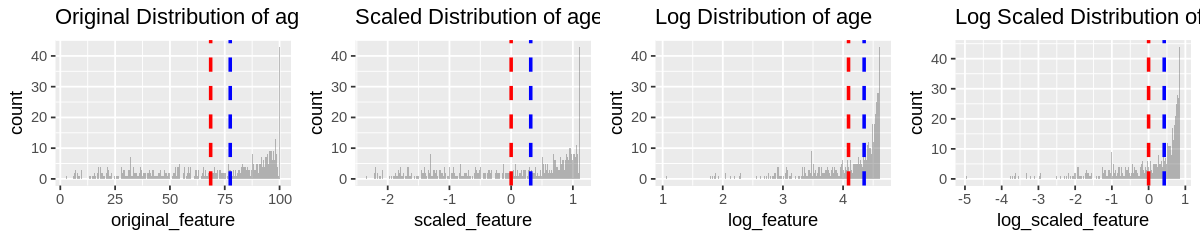

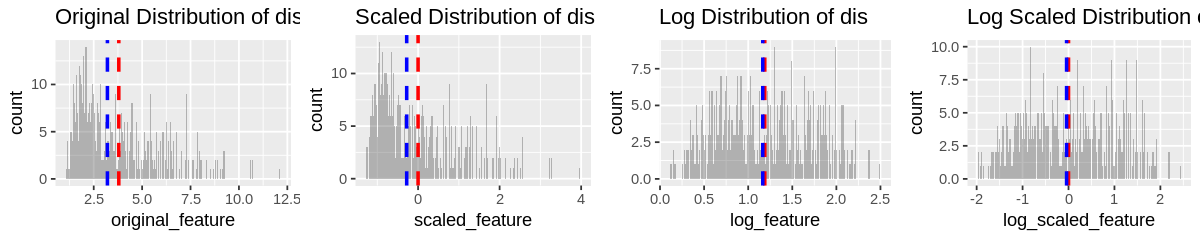

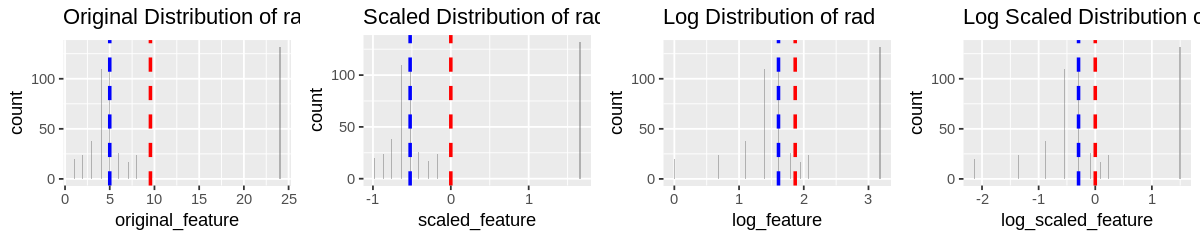

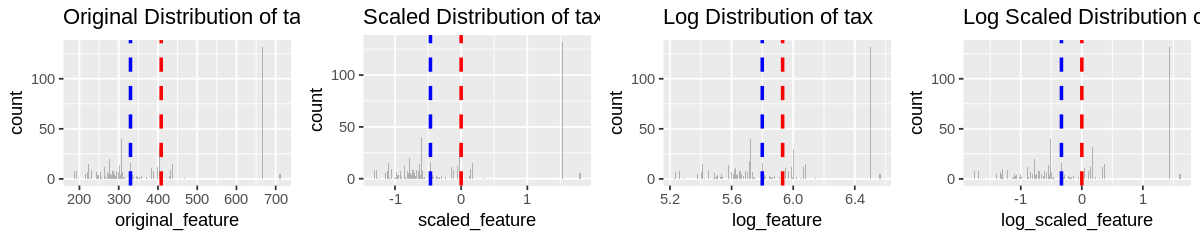

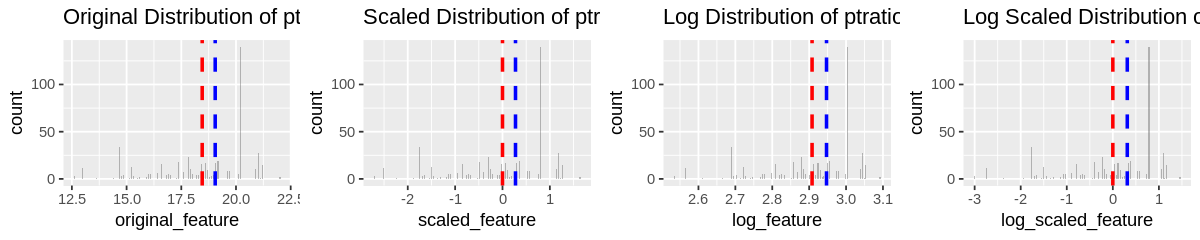

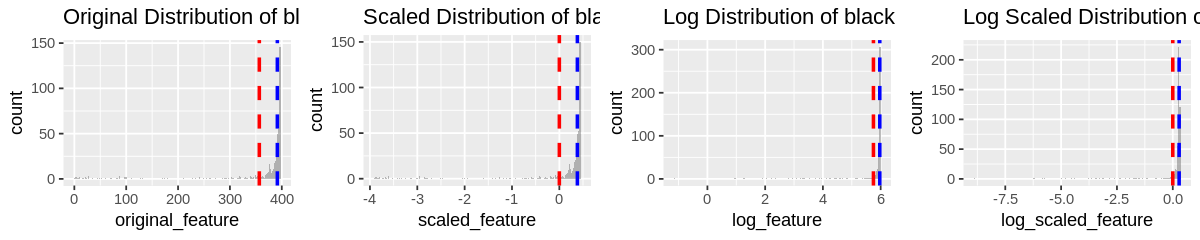

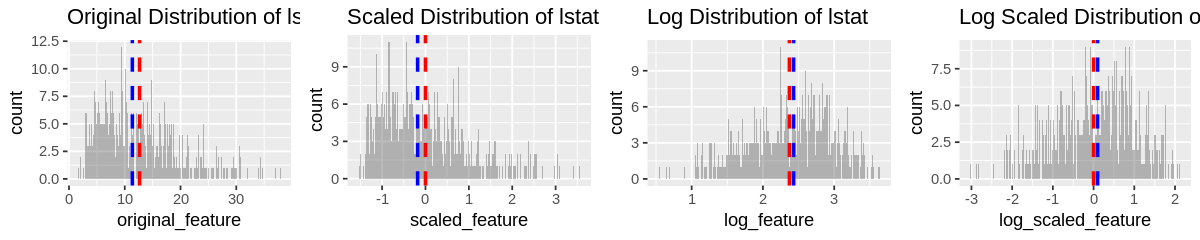

In [24]:
original_v_scaled_v_log('crim')
original_v_scaled_v_log('zn')
original_v_scaled_v_log('indus')
original_v_scaled_v_log('nox')
original_v_scaled_v_log('rm')
original_v_scaled_v_log('age')
original_v_scaled_v_log('dis')
original_v_scaled_v_log('rad')
original_v_scaled_v_log('tax')
original_v_scaled_v_log('ptratio')
original_v_scaled_v_log('black')
original_v_scaled_v_log('lstat')

Taking the log helps making a skewed distribution less skewed, to make the data look more normal. The log scaled distribution seem to have most of their means and median closer together. For the feature zn, taking the log returned NaN because taking the log of 0 approaches negative infinity. You also are not able to take the log of negative values. The log scaled distribution also makes some of the patterns more visible such as shown in crim, dis and lstat.